#**DEEP LEARNING - MIGUEL MARINES**
##**<u>Convolutional Neural Network</u>**
---
---

#### Implementation of a Convolutional Neural Network for CIFAR10 Dataset with PyTorch

In [ ]:
# Google Drive in Google Colab.
# Access to files and directories stored in Google Drive from a Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
import numpy as np                       # Operations with multidimensional arrays and mathematical functions.

import torch                             # Core PyTorch library for tensor operations and deep learning models.
import torch.nn as nn                    # PyTorch module for creating and training neural networks.
import torch.nn.functional as F          # Contains common operations like activation functions and loss functions.
from torch.utils.data import DataLoader  # For loading datasets and managing batch operations.
from torch.utils.data import sampler     # Provides utilities for sampling from datasets.
import torchvision.datasets as datasets  # Contains popular datasets and loading utilities for vision tasks.
import torchvision.transforms as T       # Provides image transformation functions (e.g., resizing, cropping, etc.).

import matplotlib.pyplot as plt          # Data visualization, especially for plotting and displaying images.

### **Download Cifar10 Dataset - Training, Validation and Test Data Split**

In [ ]:
# Path to the CIFAR-10 dataset.
DATA_PATH = '/content/drive/MyDrive/AMLM/Actividad 2/cifar-10-batches-py'

NUM_TRAIN = 50000       # Number of training samples.
NUM_VAL = 5000          # Number of validation samples.
NUM_TEST = 5000         # Number of test samples.
MINIBATCH_SIZE = 64     # Batch size for data loading.

# Image transformation (convert to tensor and normalize with dataset-specific mean and std).
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Training Set
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transform_cifar)  # Load training data.
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))  # DataLoader with random sampling.

# Validation Set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)  # Load validation data.
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))  # DataLoader for validation.

# Test Set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, transform=transform_cifar)  # Load test data.
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE, sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))  # DataLoader for testing.

100%|██████████| 170498071/170498071 [00:08<00:00, 20520052.79it/s]


Extracting /content/drive/MyDrive/AMLM/Actividad 2/cifar-10-batches-py/cifar-10-python.tar.gz to /content/drive/MyDrive/AMLM/Actividad 2/cifar-10-batches-py
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
cifar10_train                  # CIFAR-10 training dataset object.

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/AMLM/Actividad 2/cifar-10-batches-py
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
test_loader.dataset            # Dataset object used in the test DataLoader.

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/AMLM/Actividad 2/cifar-10-batches-py
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
train_loader.batch_size        # Batch size used in the training DataLoader.

64

In [ ]:
# Loop through training DataLoader, printing batch data.
for i, (x, y) in enumerate(train_loader):
     # 'x' is the input batch, 'y' is the target batch.
     print(x, y)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
          ...,
          [-9.8762e-01, -9.5586e-01, -1.0194e+00,  ..., -8.4472e-01,
           -9.2411e-01, -7.4946e-01],
          [-1.0194e+00, -1.0829e+00, -1.1146e+00,  ..., -9.5586e-01,
           -9.3999e-01, -7.8122e-01],
          [-1.0035e+00, -1.0352e+00, -1.0352e+00,  ..., -1.0988e+00,
           -8.4472e-01, -9.7174e-01]],

         [[ 9.0519e-01,  8.5677e-01,  9.0519e-01,  ...,  1.1957e+00,
            1.1795e+00,  1.1473e+00],
          [ 8.7291e-01,  8.4064e-01,  8.7291e-01,  ...,  1.1311e+00,
            1.1311e+00,  1.1150e+00],
          [ 9.6974e-01,  9.2133e-01,  9.3746e-01,  ...,  1.1795e+00,
            1.1795e+00,  1.1634e+00],
          ...,
          [-1.1121e+00, -1.0798e+00, -1.1444e+00,  ..., -1.0314e+00,
           -1.1121e+00, -9.3456e-01],
          [-1.1282e+00, -1.1766e+00, -1.2089e+00,  ..., -1.1444e+00,
           -1.1282e+00, -9.6684e-01],
          [-1.1121e+00, -1.1444e+00, -1.1444e

### **Select Device GPU or CPU**

In [ ]:
# Check if a GPU (CUDA) is available, otherwise use CPU.
if torch.cuda.is_available():
    device = torch.device('cuda')   # Set device to GPU.
else:
    device = torch.device('cpu')    # Set device to CPU.

print(device)   # Print the selected device (CPU or GPU).

cuda


### **Image Sample**

In [ ]:
# Function to plot an image.
def plot_figure(image):
    plt.imshow(np.transpose(image, (1, 2, 0)))   # Transpose the image to the correct format for displaying (H, W, C).
    plt.axis('off')                              # Hide the axis for a cleaner view.
    plt.show()                                   # Display the image.

The image shown represents a: automobile


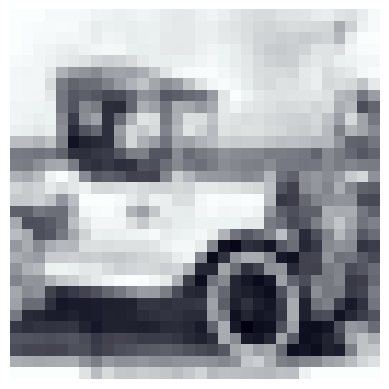

In [ ]:
# Get the list of class labels from the test dataset.
classes = test_loader.dataset.classes

# Select a random index from the test dataset.
rnd_sample_idx = np.random.randint(len(test_loader))

# Print the class label of the randomly selected image.
print(f'The image shown represents a: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Get the image corresponding to the random index.
image = test_loader.dataset[rnd_sample_idx][0]

# Normalize the image for display purposes (rescale pixel values to [0, 1]).
image = (image - image.min()) / (image.max() - image.min())

# Plot the normalized image using the plot_figure function.
plot_figure(image)

In [ ]:
# Function to plot a grid of CIFAR-10 images.
def plot_cifar10_grid():
    classes = test_loader.dataset.classes   # Get the class labels from the test dataset.
    total_samples = 8                       # Number of samples per class to display.

    plt.figure(figsize=(15, 15))            # Set the figure size.

    # Loop through each class and plot a grid of images.
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))  # Get indices of all images with the current label.
        sample_idxs = np.random.choice(class_idxs, total_samples, replace=False)     # Randomly select 'total_samples' images for the class.

        # Loop through the selected images and plot them.
        for i, idx in enumerate(sample_idxs):
            plt_idx = i * len(classes) + label + 1             # Compute subplot index.
            plt.subplot(total_samples, len(classes), plt_idx)  # Create subplot.
            plt.imshow(test_loader.dataset.data[idx])          # Display the image.
            plt.axis('off')                                    # Hide the axis.

            if i == 0: plt.title(sample)                       # Add a title (class name) to the first image of each class.

    plt.show()                                                 # Display the grid of images.

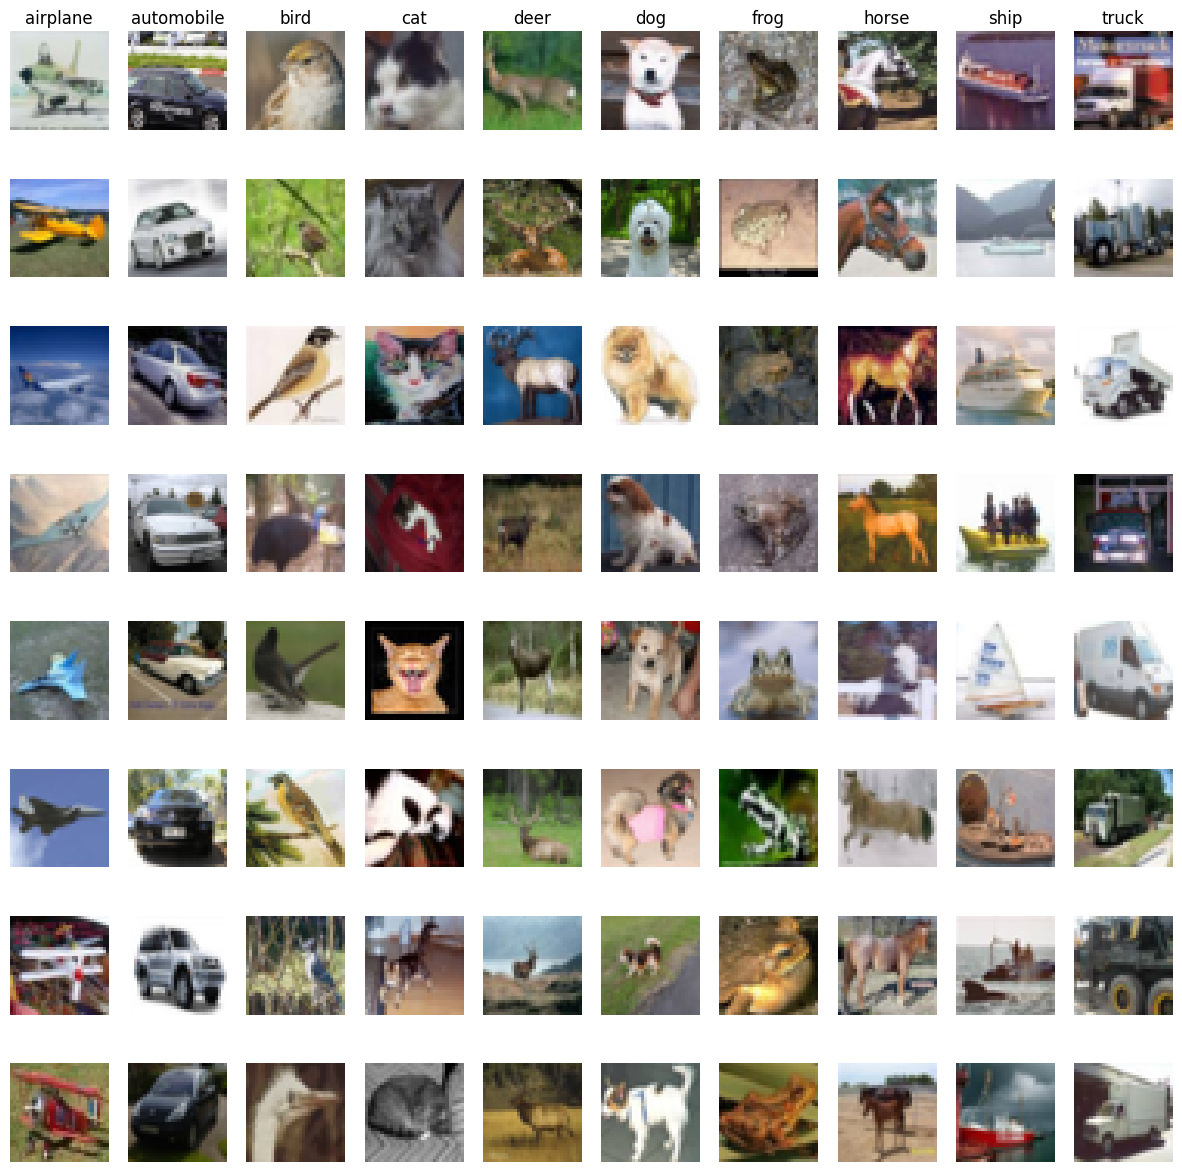

In [ ]:
# Function to plot a grid of CIFAR-10 images.
plot_cifar10_grid()

### **Accuracy**


In [ ]:
# Function to calculate the accuracy of a model on a given dataset (loader).
def accuracy(model, loader):

  num_correct = 0    # Initialize a counter for correctly predicted samples.
  num_total = 0      # Initialize a counter for total samples.
  model.eval()       # Set the model to evaluation mode (disables dropout, etc.).

  model = model.to(device=device)  # Move the model to the specified device (CPU or GPU).

  with torch.no_grad():                                # Disable gradient calculation for faster inference.

    for xi, yi in loader:                              # Loop through the data in the loader.
      xi = xi.to(device=device, dtype=torch.float32)   # Move input data to the device and convert to float32.
      yi = yi.to(device=device, dtype=torch.long)      # Move target labels to the device and convert to long.

      scores = model(xi)                               # Get the model's predictions (scores) for the input data.
      _, pred = scores.max(dim=1)                      # Get the predicted class with the highest score.

      num_correct += (pred == yi).sum()                # Count the number of correct predictions.
      num_total += pred.size(0)                        # Count the total number of samples.

  return float(num_correct) / num_total                # Return the accuracy as a percentage.

### **Training Loop**

In [ ]:
# Function to train a model for a specified number of epochs.
def train(model, optimiser, epochs=100):

  model = model.to(device=device)  # Move the model to the specified device (CPU or GPU).

  # Loop through the specified number of epochs.
  for epoch in range(epochs):

    # Loop through batches in the training DataLoader.
    for i, (xi, yi) in enumerate(train_loader):

      model.train()                                    # Set the model to training mode (enables dropout, batchnorm, etc.).

      xi = xi.to(device=device, dtype=torch.float32)   # Move input data to the device and convert to float32.
      yi = yi.to(device=device, dtype=torch.long)      # Move target labels to the device and convert to long.

      scores = model(xi)                               # Get the model's predictions (scores) for the input data.
      cost = F.cross_entropy(input=scores, target=yi)  # Compute the cross-entropy loss.

      optimiser.zero_grad()                            # Clear previous gradients before backpropagation.
      cost.backward()                                  # Backpropagate the gradients.
      optimiser.step()                                 # Update the model's weights.

    # Calculate the accuracy of the model on the validation set after each epoch.
    acc = accuracy(model, val_loader)

    # Print the current epoch, cost (loss), and accuracy on the validation set.
    print(f'Epoch: {epoch}, Cost: {cost.item()}, Accuracy: {acc}')

### **Linear Model**

PyTorch to create a linear model to have an initial baseline model.

In [ ]:
hidden1 = 256    # Number of neurons in the first hidden layer.
hidden = 256     # Number of neurons in the second hidden layer.
lr = 0.001       # Learning rate for the optimizer.
epochs = 10      # Number of training epochs.

# Define a simple feedforward neural network using nn.Sequential.
model1 = nn.Sequential(
    nn.Flatten(),                                          # Flatten the input (32x32x3) into a single vector.
    nn.Linear(in_features=32*32*3, out_features=hidden1),  # First fully connected layer.
    nn.ReLU(),                                             # ReLU activation function.
    nn.Linear(in_features=hidden1, out_features=hidden),   # Second fully connected layer.
    nn.ReLU(),                                             # ReLU activation function.
    nn.Linear(in_features=hidden, out_features=10)         # Output layer with 10 units (one for each CIFAR-10 class).
)

# Define the Adam optimizer with the model's parameters and the specified learning rate.
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [ ]:
train(model1, optimiser, epochs)  # Train the model (model1) using the specified optimizer (optimiser) for the defined number of epochs.

Epoch: 0, Cost: 1.4085352420806885, Accuracy: 0.4678
Epoch: 1, Cost: 1.2547065019607544, Accuracy: 0.4966
Epoch: 2, Cost: 1.2338743209838867, Accuracy: 0.5054
Epoch: 3, Cost: 1.4572523832321167, Accuracy: 0.5122
Epoch: 4, Cost: 1.50490140914917, Accuracy: 0.5074
Epoch: 5, Cost: 1.1050642728805542, Accuracy: 0.522
Epoch: 6, Cost: 0.7856301665306091, Accuracy: 0.5236
Epoch: 7, Cost: 1.2054331302642822, Accuracy: 0.5154
Epoch: 8, Cost: 1.0869783163070679, Accuracy: 0.5308
Epoch: 9, Cost: 0.7214356660842896, Accuracy: 0.5304


### **Sequential CNN**

PyTorch to implement a CNN model, accuracy should be better than the linear model.

In [ ]:
channel1 = 16    # Number of filters in the first convolutional layer.
channel2 = 32    # Number of filters in the second convolutional layer.
channel3 = 64    # Number of filters in the third convolutional layer (new layer with more filters).
epochs = 10      # Number of training epochs.
lr = 0.001       # Learning rate for the optimizer.

# Define a Convolutional Neural Network (CNN) using nn.Sequential.
CNN_model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=3, padding=1),         # First convolutional layer.
    nn.ReLU(),                                                                         # ReLU activation function.
    nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1),  # Second convolutional layer.
    nn.ReLU(),                                                                         # ReLU activation function.
    nn.MaxPool2d(2, 2),                                                                # Max pooling layer to reduce spatial dimensions.
    nn.Conv2d(in_channels=channel2, out_channels=channel3, kernel_size=3, padding=1),  # Third convolutional layer (new layer).
    nn.ReLU(),                                                                         # ReLU activation function.
    nn.MaxPool2d(2, 2),                                                                # Max pooling layer to reduce spatial dimensions again.
    nn.Flatten(),                                                                      # Flatten the output for the fully connected layer.
    # After the second max pooling, the spatial dimensions change from 16x16 to 8x8.
    nn.Linear(in_features=8*8*channel3, out_features=10)                               # Fully connected layer for classification with 10 output units.
)

# Define the Adam optimizer with the model's parameters and the specified learning rate.
optimiser = torch.optim.Adam(CNN_model.parameters(), lr)

In [ ]:
# Train the Convolutional Neural Network model (CNN_model) using the specified optimizer and number of epochs.
train(CNN_model, optimiser, epochs)

Epoch: 0, Cost: 0.6620999574661255, Accuracy: 0.6294
Epoch: 1, Cost: 1.1077630519866943, Accuracy: 0.6796
Epoch: 2, Cost: 0.25275498628616333, Accuracy: 0.7036
Epoch: 3, Cost: 0.5530750155448914, Accuracy: 0.7226
Epoch: 4, Cost: 0.5134854912757874, Accuracy: 0.7218
Epoch: 5, Cost: 0.4680878221988678, Accuracy: 0.7402
Epoch: 6, Cost: 0.9822999238967896, Accuracy: 0.7406
Epoch: 7, Cost: 0.16649924218654633, Accuracy: 0.7286
Epoch: 8, Cost: 0.38867706060409546, Accuracy: 0.7242
Epoch: 9, Cost: 0.30079883337020874, Accuracy: 0.734


In [ ]:
# Calculate and return the accuracy of the Convolutional Neural Network model (CNN_model) on the test dataset (test_loader).
accuracy(CNN_model, test_loader)

0.731